## import lib

In [10]:
import pandas as pd
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

## Load Data

In [11]:
df = pd.read_csv('zoo.csv', index_col='animal_name')
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
animal_name,,,,,,,,,,,,,,,,,
aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


## Split dataset

In [12]:
X = df.loc[:, 'hair':'catsize']
y = df['class_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [13]:
sc = MinMaxScaler().fit(X_train) # scale the data
X_train_std = sc.transform(X_train)
sc1 = MinMaxScaler().fit(X_test)
X_test_std = sc1.transform(X_test)

In [14]:
model = RandomForestClassifier(class_weight = 'balanced', criterion = 'entropy', max_depth = 15, max_features = 'sqrt',
                               min_samples_split = 2, n_estimators=400, random_state = 42)
model.fit(X_train_std, y_train)
y_train_pred = model.predict(X_train_std)
y_pred = model.predict(X_test_std)

## Cek score training

In [15]:
confusion = confusion_matrix(y_train, y_train_pred)
confusion

array([[33,  0,  0,  0,  0,  0,  0],
       [ 0, 16,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0],
       [ 0,  0,  0, 10,  0,  0,  0],
       [ 0,  0,  0,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  0,  6,  0],
       [ 0,  0,  0,  0,  0,  0,  8]], dtype=int64)

In [16]:
model.score(X_train_std, y_train)

1.0

## cek score test

In [17]:
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[8, 0, 0, 0, 0, 0, 0],
       [0, 4, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 2]], dtype=int64)

In [18]:
model.score(X_test_std, y_pred)

1.0

##### Diperoleh hasil score yaitu 1 untuk training dan tets. Model dapat melakukan clasifikasi secara tepat

## Feature important

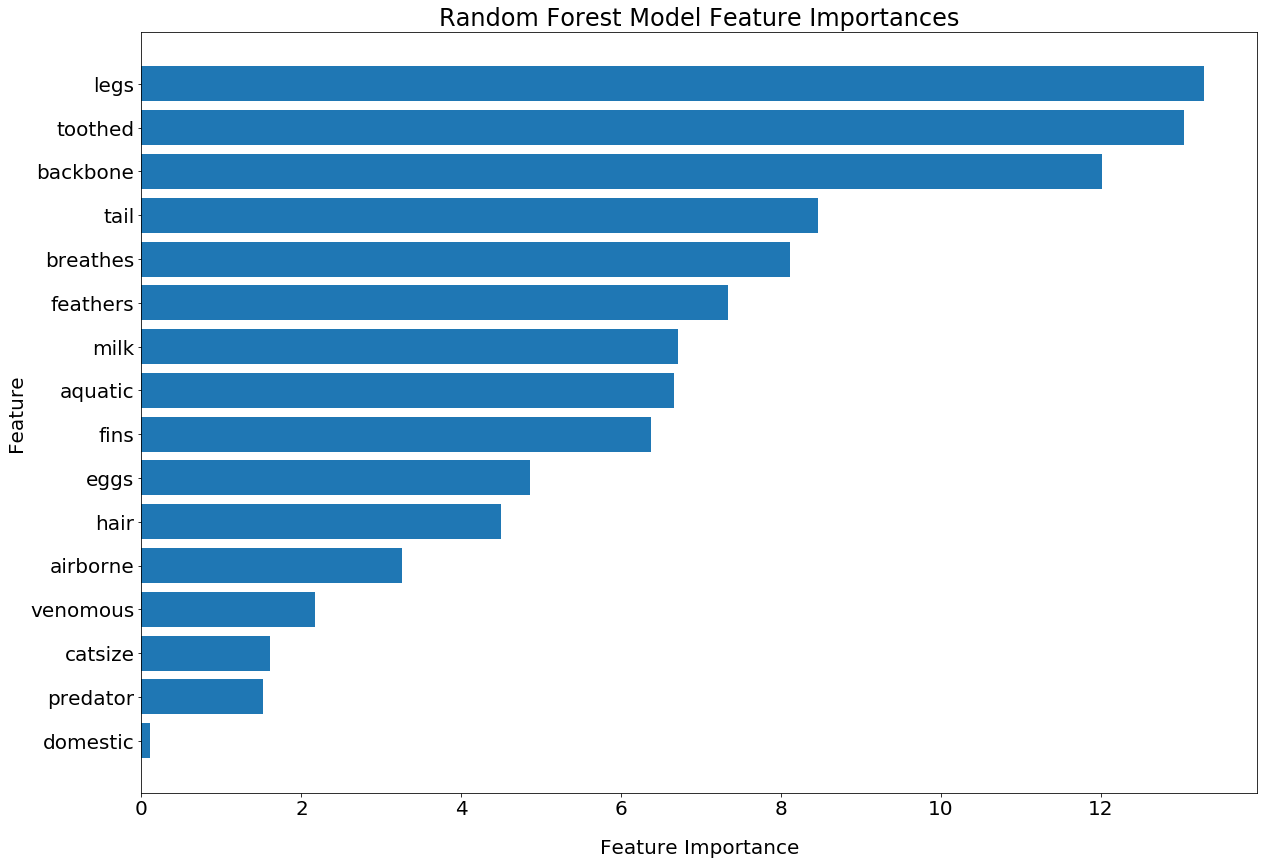

In [19]:
importances_list = model.feature_importances_
features = X.columns.values
feature_importances = model.feature_importances_ * 100
features = df.columns.values[:-1]
feature_importances_df = pd.DataFrame(data = importances_list * 100, index = features, 
             columns=['Feature Importance']).sort_values(by = 'Feature Importance', ascending = False)
y_pos = np.arange(len(feature_importances_df)) #for specifying the y positions of the bar plot
fig = plt.figure(figsize=(20,14)) #increase graph size
plt.barh(y_pos, np.flipud(feature_importances_df.loc[:, 'Feature Importance'].values), align='center') #plot the horizontal bars --> position, bar length
plt.xticks(size=20)
plt.yticks(y_pos, np.flipud(feature_importances_df.index.values), size=20) #plot bar labels
plt.xlabel('Feature Importance', size=20, labelpad=20) #labelpad increases space between xlabel and xaxis
plt.ylabel('Feature', size=20)
plt.title('Random Forest Model Feature Importances', size=24);

## Membuat model baru dengan hanya mengambil 10 dari 16 feature

In [20]:
features_to_keep = feature_importances_df.index.values[:10]
small_df = df[features_to_keep]

X_train, X_test, y_train, y_test = train_test_split(small_df, y, test_size=0.20, random_state=42, stratify=y)

sc = MinMaxScaler().fit(X_train) # scale the data
X_train_std = sc.transform(X_train)
sc1 = MinMaxScaler().fit(X_test)
X_test_std = sc1.transform(X_test)

model = RandomForestClassifier(class_weight=None, criterion='gini', max_depth=11, max_features='log2',
                               min_samples_split=4, n_estimators=200)
model.fit(X_train_std, y_train)
y_train_pred = model.predict(X_train_std)
y_pred = model.predict(X_test_std)

## Cek score train dan test

In [22]:
confusion = confusion_matrix(y_train, y_train_pred)
confusion

array([[33,  0,  0,  0,  0,  0,  0],
       [ 0, 16,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0],
       [ 0,  0,  0, 10,  0,  0,  0],
       [ 0,  0,  0,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  0,  6,  0],
       [ 0,  0,  0,  0,  0,  0,  8]], dtype=int64)

In [23]:
model.score(X_train_std, y_train)

1.0

In [24]:
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[8, 0, 0, 0, 0, 0, 0],
       [0, 4, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 2]], dtype=int64)

In [25]:
model.score(X_test_std, y_pred)

1.0

###### Dengan menggunakan 10 feature utama, diperoleh hasil training dan test dengan score 1. Ini menandakan model dengan 10 feature dapat bekerja dengan performa sama dengan model dengan 16 feature. Model baru dengan 10 feature ini akan digunakan.

## Load data class hewan

In [27]:
classAnimals = pd.read_csv('class.csv')
classAnimals.head()

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"


## Ubah kedalam bentuk array

In [29]:
classAnimals=classAnimals.as_matrix()

## Membuat file .pkl dengan isi model dan classAnimal

In [30]:
tempRest = [model,classAnimals]
#export variabel yang ingin dikeluarkan dari objectnya
from sklearn.externals import joblib
joblib.dump(tempRest,'randomForestClassifier.pkl')

['randomForestClassifier.pkl']

## Tampil Isi File

In [31]:
newClf = joblib.load('randomForestClassifier.pkl')

print(newClf)

[RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=11, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False), array([[1, 41, 'Mammal',
        'aardvark, antelope, bear, boar, buffalo, calf, cavy, cheetah, deer, dolphin, elephant, fruitbat, giraffe, girl, goat, gorilla, hamster, hare, leopard, lion, lynx, mink, mole, mongoose, opossum, oryx, platypus, polecat, pony, porpoise, puma, pussycat, raccoon, reindeer, seal, sealion, squirrel, vampire, vole, wallaby, wolf'],
       [2, 20, 'Bird',
        'chicken, crow, dove, duck, flamingo, gull, hawk, kiwi, lark, ostrich, parakeet, penguin, pheasant, rhea, skimmer, skua, sparrow, swan, vulture, wren'],
       [3, 5, 'Reptile',
        